In [3]:
from sympy import *

In [2]:
t, g, m, k = symbols("t g m k")
v = Function("v")
h = Function("h")


In [3]:
de1 = Eq(m*diff(v(t), t), -m*g)
de1

Eq(m*Derivative(v(t), t), -g*m)

In [4]:
Vt_ = dsolve(de1, v(t), ics={v(0): 100})
Vt_

Eq(v(t), -g*t + 100)

In [5]:
Vt = Vt_.subs({g:1.6})
# или так dsol2 = sol1.subs(g, 1.6) 
Vt

Eq(v(t), 100 - 1.6*t)

In [6]:
de2 = Eq(diff(h(t), t), Vt.rhs)
de2

Eq(Derivative(h(t), t), 100 - 1.6*t)

In [7]:
Ht = dsolve(de2, h(t), ics={h(0): 0})
Ht

Eq(h(t), -0.8*t**2 + 100.0*t)

In [8]:
 # если уравнение трансцендентное необходимо использовать nsolve(Vt.rhs, t, 1)
tmax = solve(Eq(Vt.rhs, 0), t) 
tmax[0]
# Время достижения максимальной высоты

62.5000000000000

In [13]:
t1t2 = solve(Eq(Ht.rhs, 0), t)
tback = t1t2[1]
tback
# Время полного пути

125.000000000000

In [10]:
hmax = Ht.subs(t, tmax[0]) 
hmax

Eq(h(62.5), 3125.0)

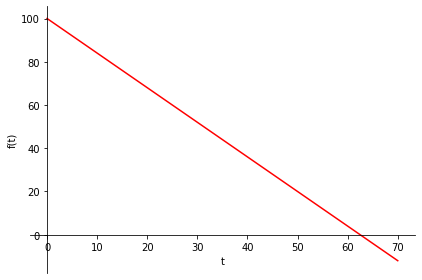

In [11]:
Vplot = plot(Vt.rhs, (t, 0, 70), line_color='red')

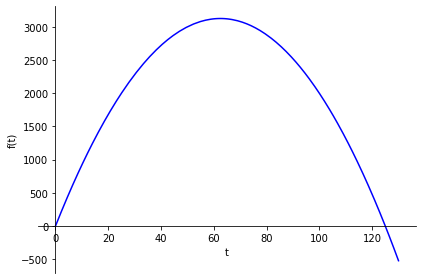

In [12]:
Hplot = plot(Ht.rhs, (t, 0, 130), line_color='blue')

# Задание 1
### По описанной выше схеме для Вашего варианта вычислите производную из пункта (а) аналитической части (задание 1.1)


In [7]:
import sympy as sym

x = Symbol('x')
f = -1 + sym.exp(-x)*sym.cos(x+2)

diff(f, x)

-exp(-x)*sin(x + 2) - exp(-x)*cos(x + 2)

### Решение моего варианта ДУ 

In [33]:
x = Symbol('x')
y = Symbol('y')
C = Symbol('C')

dydx = Derivative(y, x) 

eq = Eq(dydx, 4*x*sym.log(x))
eq

Eq(Derivative(y, x), 4*x*log(x))

In [34]:
sol = solve(eq, dydx)[0]
sol

4*x*log(x)

In [35]:
dsol = integrate(sol, x) + C
dsol

C + 2*x**2*log(x) - x**2

In [39]:
# Находим константу интегрирования, решая уравнение y(0, C) = 1
x0, y0 = 0, 1
X = dsol.subs(x, x0) # подставили x0 вместо x в решение dsol
eq = Eq(y0, X) # приравняли к y0
'''
Sympy ругается на то, что мы рассматриваем логарифм в нуле (не соответствует одз)
Поэтому я сразу приравняю С к 1
'''
dsol.subs(C, 1)

2*x**2*log(x) - x**2 + 1

# Задание 2

In [111]:
import numpy as np

w0 = Symbol('w0')
a = Symbol('a')
g = Symbol('g')
t = Symbol('t')
x = Symbol('x')
y = Symbol('y')

x0 =0
y0 = 0
u0 = w0*sym.cos(a)
v0 = w0*sym.sin(a)

U = 0
V = -g

u = integrate(U, t) + u0
v = integrate(V, t) + v0

In [78]:
print(u)
print(v)

w0*cos(a)
-g*t + w0*sin(a)


In [85]:
xsol = integrate(u, t) + x0
ysol = integrate(v, t) + y0

In [86]:
xsol

t*w0*cos(a)

In [87]:
ysol

-g*t**2/2 + t*w0*sin(a)

In [89]:
eq = Eq(ysol, 0)
eq

Eq(-g*t**2/2 + t*w0*sin(a), 0)

In [102]:
t1 = solve(eq, t)[1]
t1

2*w0*sin(a)/g

In [113]:
x1 = xsol.subs(t, t1)
x1

2*w0**2*sin(a)*cos(a)/g

In [108]:
T = solve(Eq(xsol, x), t)[0] # выразили t через x
Y = ysol.subs(t, T) # подставили T в y(t) вместо t
Y # вывод формулы на экран

-g*x**2/(2*w0**2*cos(a)**2) + x*sin(a)/cos(a)

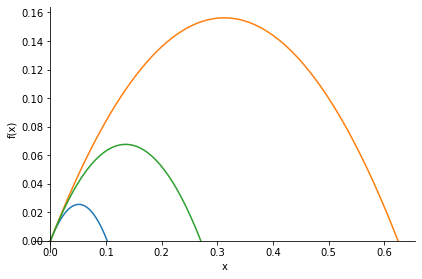

In [141]:
# Земля
ya = Y.subs(g, 9.8).subs(w0, 1).subs(a, np.pi/4) # уравнение траектории
x1a = x1.subs(g, 9.8).subs(w0, 1).subs(a, np.pi/4) # точка падения

# Луна
ymoon = Y.subs(g, 1.6).subs(w0, 1).subs(a, np.pi/4) # уравнение траектории
x1moon = x1.subs(g, 1.6).subs(w0, 1).subs(a, np.pi/4) # точка падения

# Марс
ymars = Y.subs(g, 3.7).subs(w0, 1).subs(a, np.pi/4) # уравнение траектории
x1mars = x1.subs(g, 3.7).subs(w0, 1).subs(a, np.pi/4) # точка падения


p1 = plot((ya, (x, 0, x1a)), ((ymoon, (x, 0, x1moon))), ((ymars, (x, 0, x1mars))))


In [142]:
x1a

0.102040816326531

In [143]:
x1moon

0.625000000000000

In [144]:
x1mars

0.270270270270270

# Задание 3

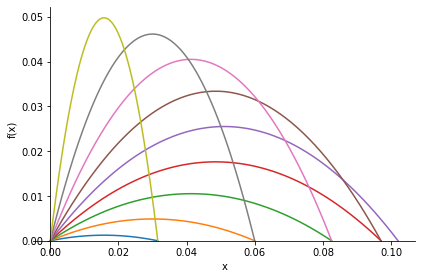

In [213]:
# Земля
ya = Y.subs(g, 9.8).subs(w0, 1) # уравнение траектории
x1a = x1.subs(g, 9.8).subs(w0, 1) # точка падения

ya_mass = [ya.subs(a, i) for i in np.arange(np.pi/20, np.pi/2, np.pi/20)]
x1mass = [x1a.subs(a, i) for i in np.arange(np.pi/20, np.pi/2, np.pi/20)]

result = tuple([tuple([i, (x, 0, j)]) for i, j in zip(ya_mass, x1mass)])
p = plot(show=False) # пустой график

for i in range(len(result)):
    p1 = plot(result[i], show=False)
    p.extend(p1)
p.show()

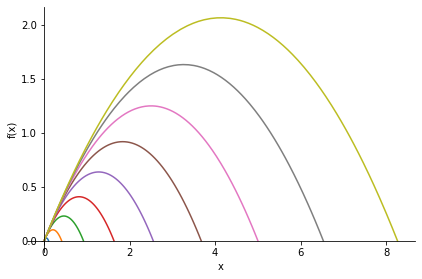

In [214]:
ya = Y.subs(g, 9.8).subs(a, np.pi/4) # уравнение траектории
x1a = x1.subs(g, 9.8).subs(a, np.pi/4) # точка падения

ya_mass = [ya.subs(w0, i) for i in np.arange(1, 10, 1)]
x1mass = [x1a.subs(w0, i) for i in np.arange(1, 10, 1)]

result = tuple([tuple([i, (x, 0, j)]) for i, j in zip(ya_mass, x1mass)])
p = plot(show=False) # пустой график

for i in range(len(result)):
    p1 = plot(result[i], show=False)
    p.extend(p1)
p.show()

# Задание 4

In [1]:
from sympy import *

t, k, g, m = symbols("t k g m")
y = Function('y')(t)

f = -m*g - m*k*diff(y, t)
eq = Eq(m*diff(y,t,2), f)
eq

Eq(m*Derivative(y(t), (t, 2)), -g*m - k*m*Derivative(y(t), t))

In [2]:
# Уравнение движения
ics={y.subs(t,0) : 50, y.diff().subs(t, 0) : 0}

dsol = dsolve(eq.subs({g:9.8, k:0.01}), y, ics=ics)
dsol

Eq(y(t), -980.0*t + 98050.0 - 98000.0*exp(-0.01*t))

In [ ]:
# Найдем время падения 
# solve(dsol.subs(y, 0), t)
# Решение уравнения t = 50
Tfall = 3.211

### 1. Скорость тела в момент падения

In [4]:
# Найдем скорость в момент падения
v = Function('v')
eq_v = Eq(diff(v(t), t), g-k*v(t))
eq_v = dsolve(eq_v.subs({g:9.8, k:0.01}), v(t), ics={v(0): 0})
eq_v.subs(t, Tfall)

Eq(v(3.211), 30.9679488298696)

### 2. Время падения шара

In [5]:
Tfall

3.211

### 3. График скорости шара

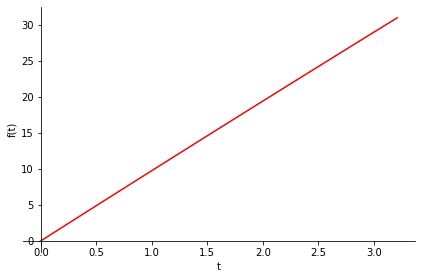

In [6]:
Vplot = plot(eq_v.rhs, (t, 0, Tfall), line_color='red')

### 4. График изменения высоты шара

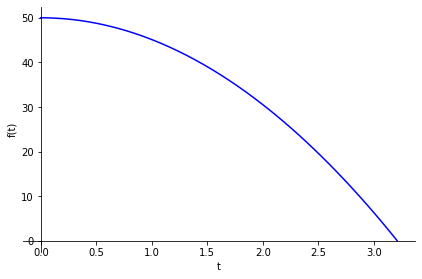

In [7]:
Hplot = plot(dsol.rhs, (t, 0, Tfall), line_color='blue')